# Supermarket Sales
Historical record of sales data in 3 different supermarkets

The growth of supermarkets in most populated cities are increasing and market competitions are also high. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 3 months data. Predictive data analytics methods are easy to apply with this dataset.

Invoice id: Computer generated sales slip invoice identification number

Branch: Branch of supercenter (3 branches are available identified by A, B and C).

City: Location of supercenters

Customer type: Type of customers, recorded by Members for customers using member card and Normal for without member card.

Gender: Gender type of customer

Product line: General item categorization groups - Electronic 

accessories, Fashion accessories, Food and beverages, Health and beauty, Home and lifestyle, Sports and travel

Unit price: Price of each product in $

Quantity: Number of products purchased by customer

Tax: 5% tax fee for customer buying

Total: Total price including tax

Date: Date of purchase (Record available from January 2019 to March 2019)

Time: Purchase time (10am to 9pm)

Payment: Payment used by customer for purchase (3 methods are available – Cash, Credit card and Ewallet)

COGS: Cost of goods sold

Gross margin percentage: Gross margin percentage

Gross income: Gross income

Rating: Customer stratification rating on their overall shopping 
experience (On a scale of 1 to 10)

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv(r'C:\Users\Shiva\Downloads\FSDS---srinu\KAGGLE, LINKEDIN\GITHUB\Supermarket_Sales_prediction-main\Supermarket_Sales_prediction-main\supermarket_sales - Sheet1.csv')

In [3]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6


In [5]:
data.shape

(1000, 17)

Dataset contains 17 columns with 1000 observations.

In [6]:
data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [9]:
data.describe(include='O')

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


# Exploratory Data Analysis

Univariate Analysis

<Axes: xlabel='Gender', ylabel='count'>

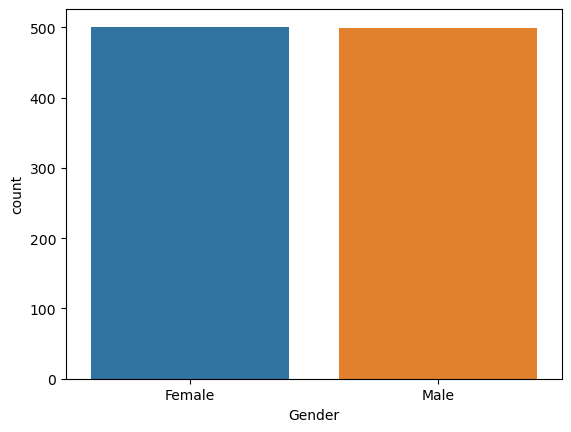

In [10]:
sns.countplot(x='Gender',data=data)

# Bivariate Analysis

<Axes: xlabel='City'>

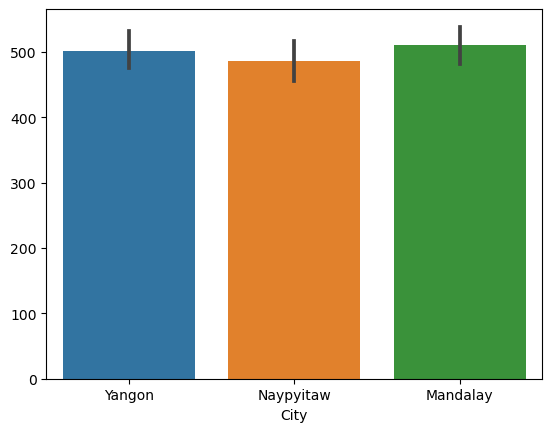

In [11]:
sns.barplot(x=data['City'],y=data['City'].index,data=data)

<Axes: xlabel='Payment'>

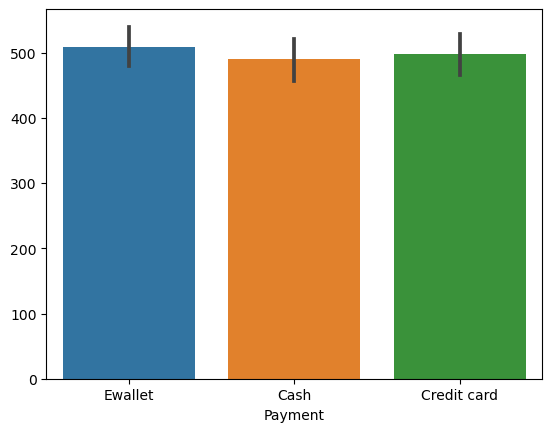

In [12]:
sns.barplot(x=data['Payment'],y=data['Payment'].index,data=data)

<Axes: xlabel='Product line', ylabel='gross income'>

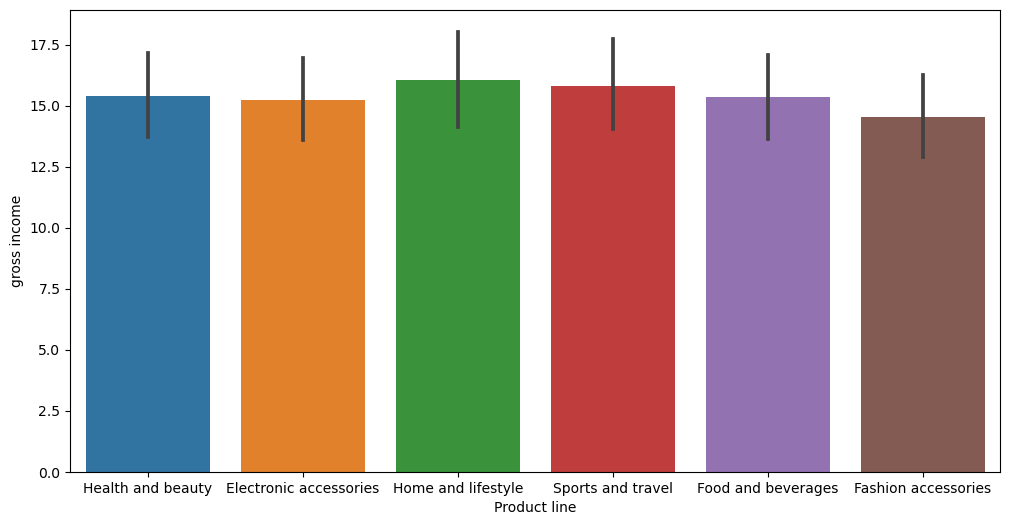

In [13]:
plt.figure(figsize=(12,6))
sns.barplot(x=data['Product line'], y=data['gross income'])

<Axes: xlabel='Rating', ylabel='Product line'>

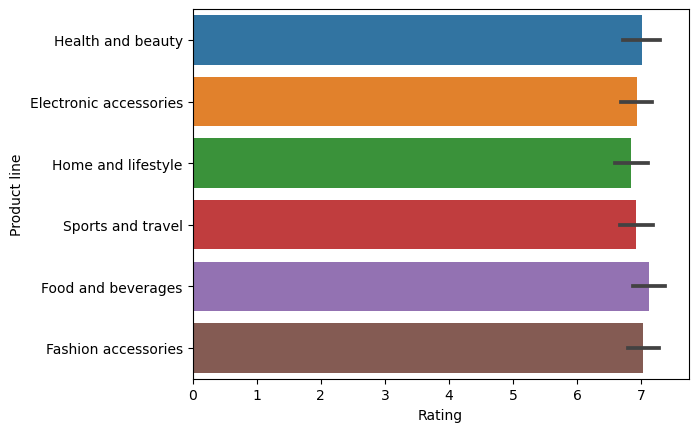

In [15]:
sns.barplot(y=data['Product line'],x=data['Rating'])

<Axes: xlabel='Total', ylabel='Product line'>

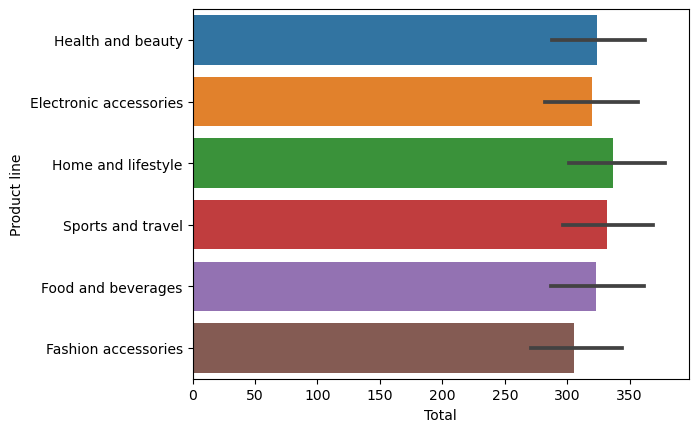

In [16]:
sns.barplot(x=data['Total'],y=data['Product line'])

# Multivariate Analysis

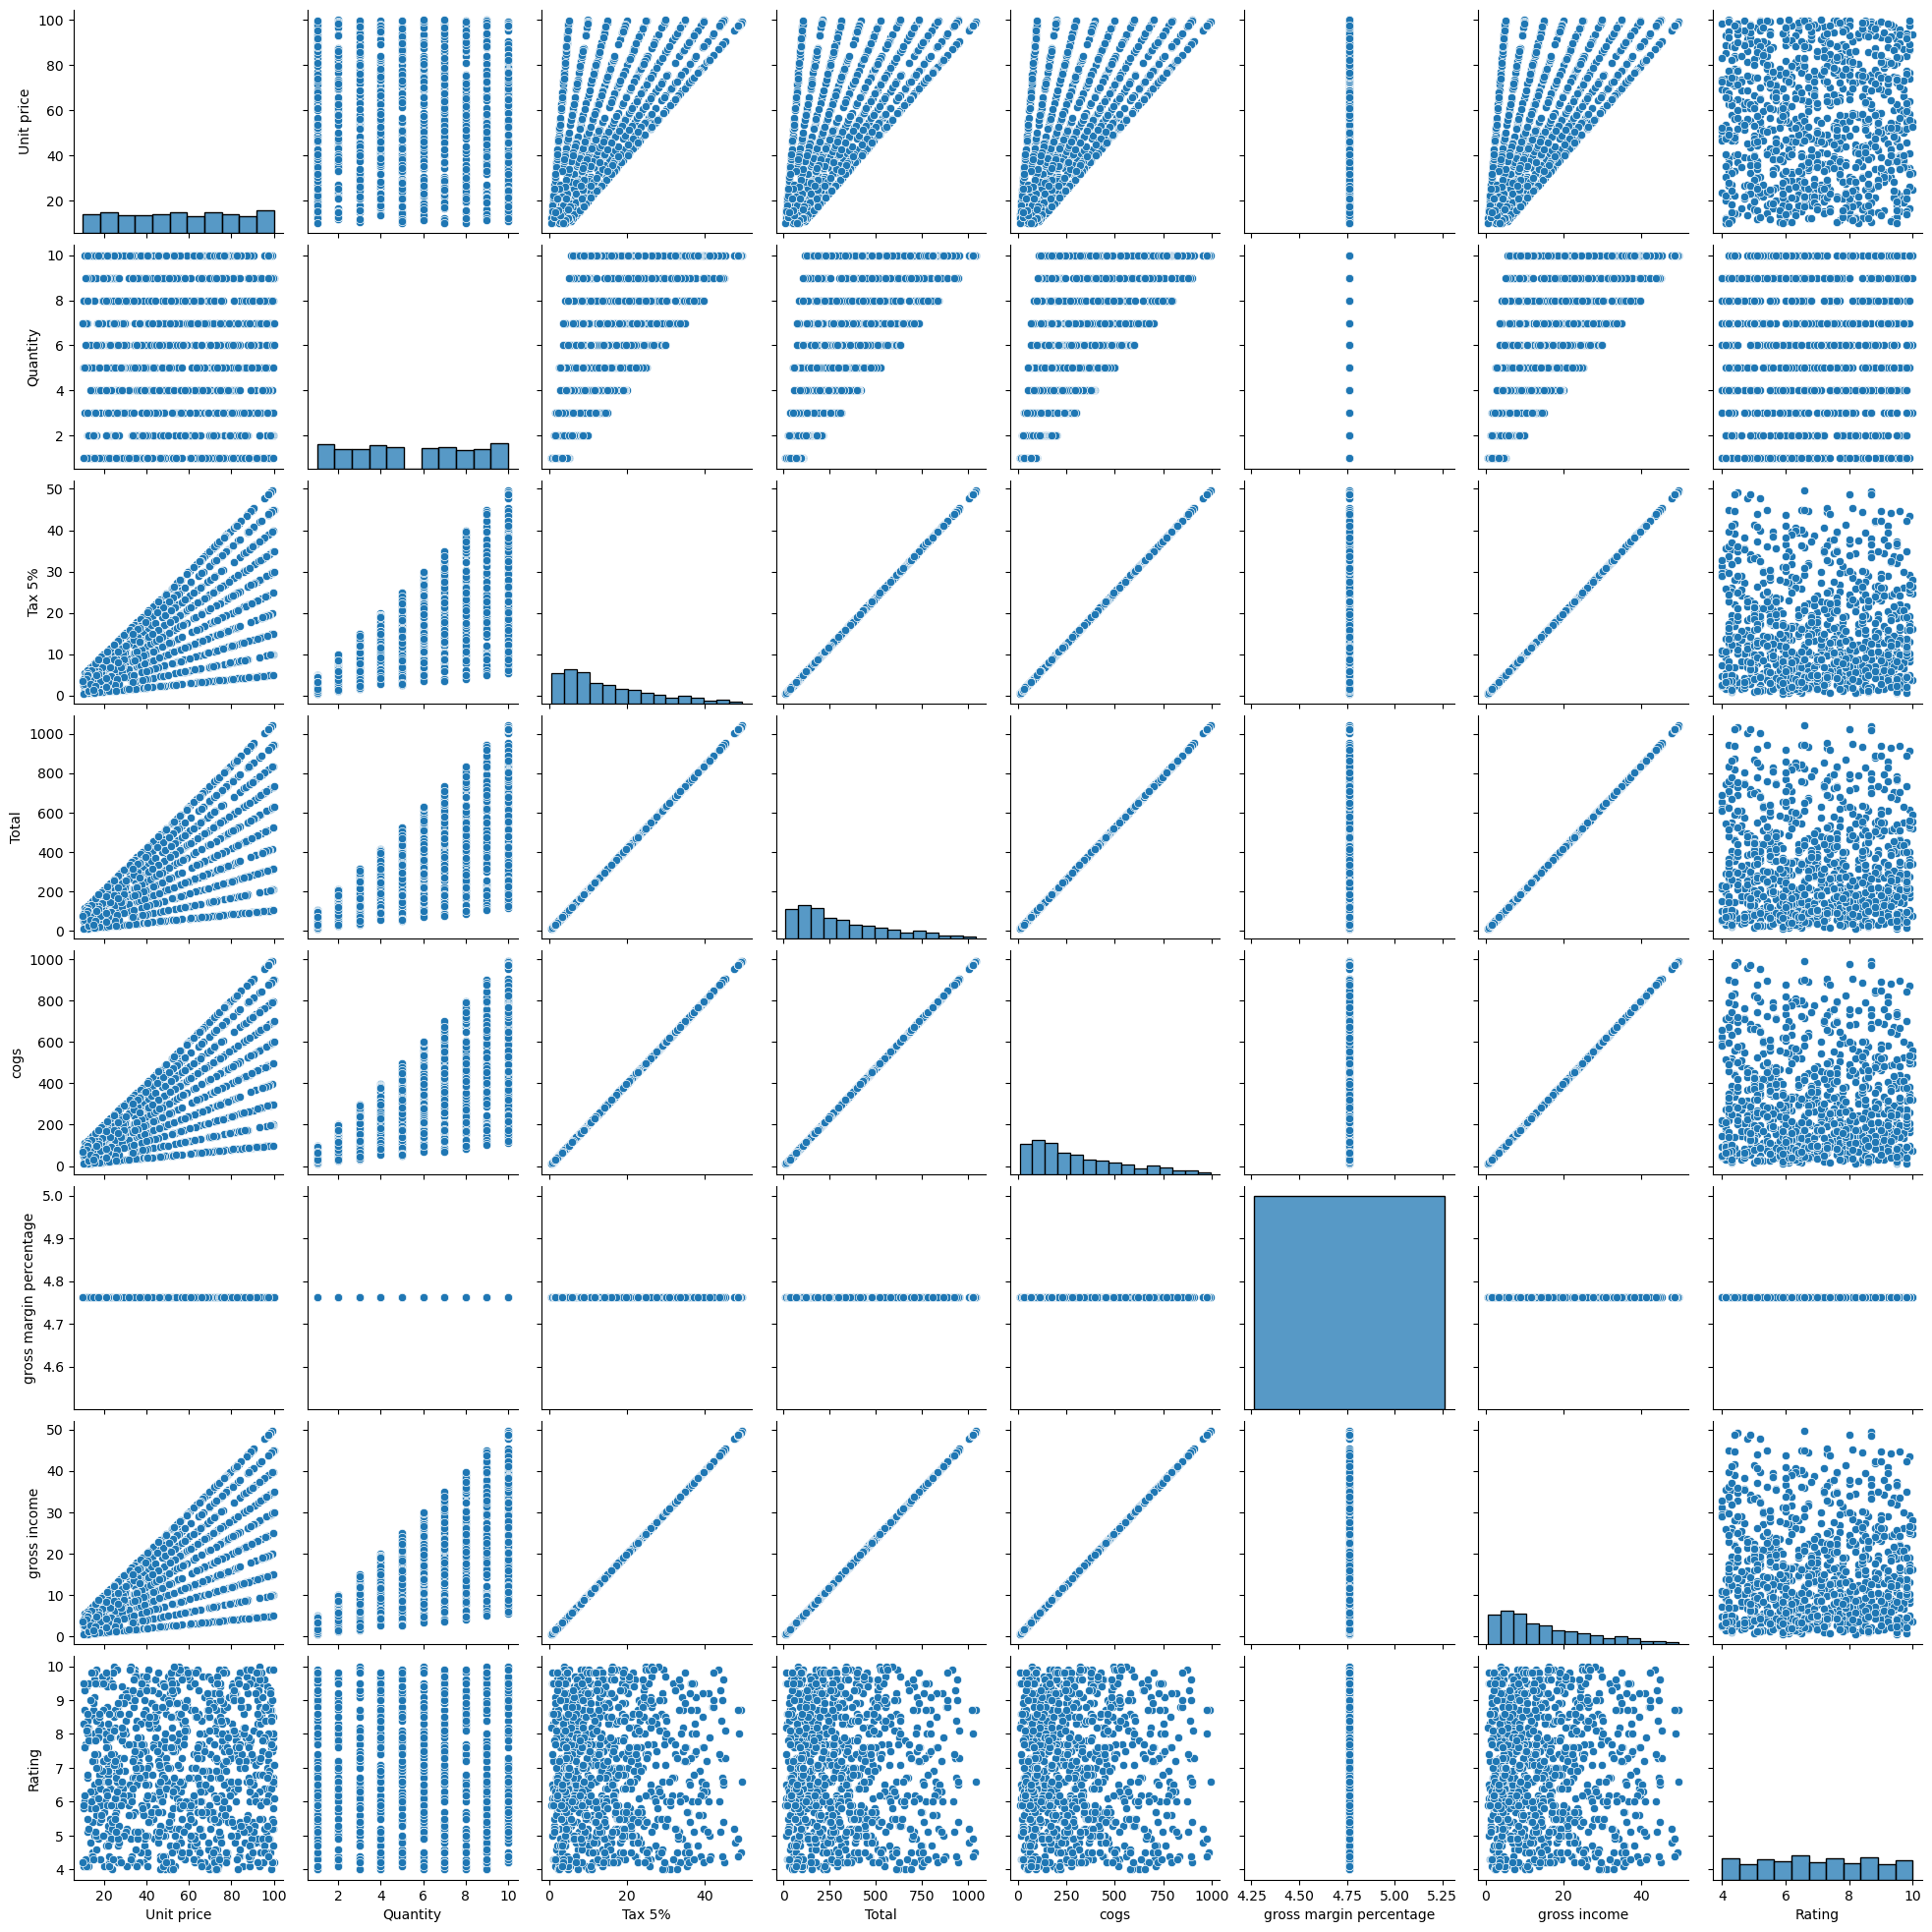

In [17]:
sns.pairplot(data)

# Data Preprocessing

In [18]:
data.drop('Invoice ID',axis=1,inplace=True)
data.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [19]:
data.isnull().sum()

Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

 No missing values present in dataset.

In [20]:
data.Branch.value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

In [21]:
data['Branch']=data['Branch'].map({'A':2,'B':1,'C':0})

In [23]:
data.City.value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [24]:
data['City']=data['City'].map({'Yangon':2,'Mondalay':1,'Naypyitaw':0})

In [25]:
data['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

In [26]:
data['Customer type']=data['Customer type'].map({'Member':1,'Normal':0})

In [27]:
data.Gender.value_counts()

Gender
Female    501
Male      499
Name: count, dtype: int64

In [28]:
data['Gender']=data['Gender'].map({'Female':1,'Male':0})

In [29]:
data['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Product line']=lb.fit_transform(data['Product line'])

In [32]:
data['Product line'].value_counts()

Product line
1    178
2    174
0    170
5    166
4    160
3    152
Name: count, dtype: int64

In [34]:
data.Payment.value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [35]:
data.Payment=data.Payment.map({'Ewallet':2,'Cash':1,'Credit card':0})

In [37]:
# Changing the Date & Time from object to datetime 
data['Date']=pd.to_datetime(data['Date'])
data['Time']=pd.to_datetime(data['Time'])

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Branch                   1000 non-null   int64         
 1   City                     668 non-null    float64       
 2   Customer type            1000 non-null   int64         
 3   Gender                   1000 non-null   int64         
 4   Product line             1000 non-null   int32         
 5   Unit price               1000 non-null   float64       
 6   Quantity                 1000 non-null   int64         
 7   Tax 5%                   1000 non-null   float64       
 8   Total                    1000 non-null   float64       
 9   Date                     1000 non-null   datetime64[ns]
 10  Time                     1000 non-null   datetime64[ns]
 11  Payment                  1000 non-null   int64         
 12  cogs                     1000 non-n

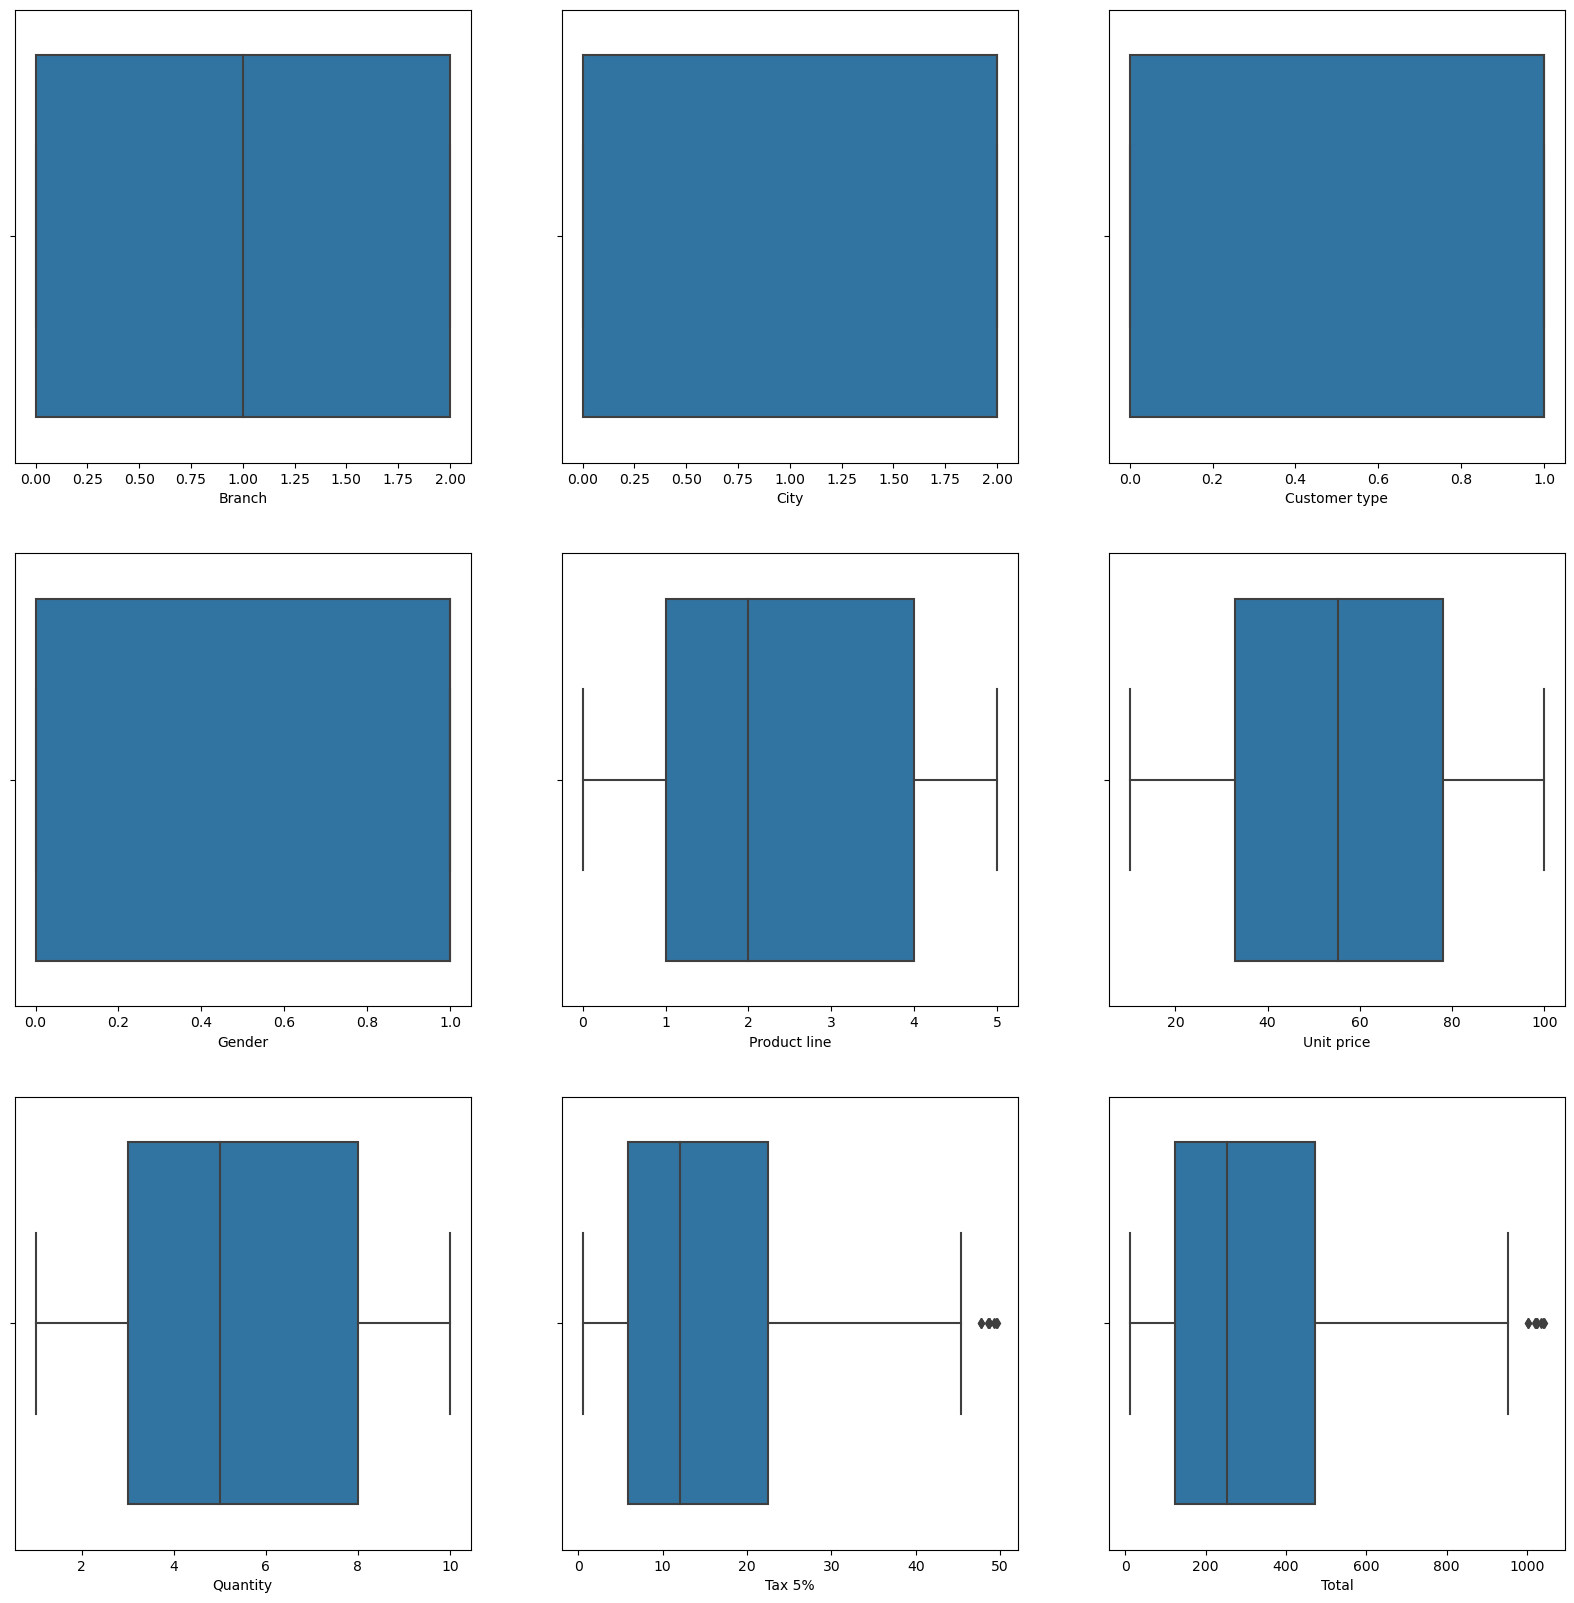

In [39]:
plt.figure(figsize=(20,20))
plotnumber=1

for column in data:
    if plotnumber<10:
        plt.subplot(3,3,plotnumber)
        sns.boxplot(x=data[column],data=data)
    plotnumber+=1
plt.show()    

Tax 5% and Total fetures contains outliers.

<Axes: xlabel='Tax 5%', ylabel='Density'>

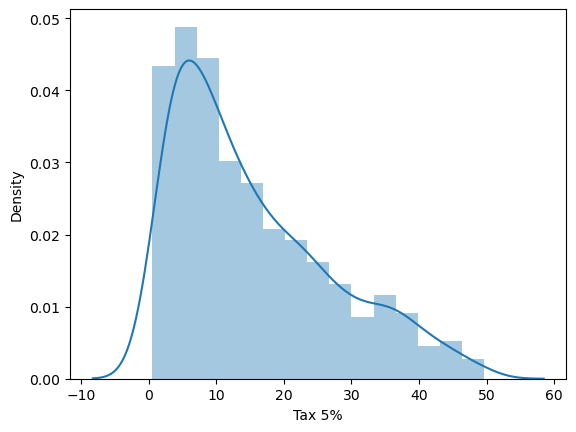

In [40]:
# Check distribution of outliers
sns.distplot(data['Tax 5%'])

In [42]:
# Interquartile range (IQR) 
from scipy import stats
IQR = stats.iqr(data['Tax 5%'],interpolation='midpoint')
IQR

16.56575

In [43]:
# Min & Max limit calculation
# First Quantile
Q1 = data['Tax 5%'].quantile(0.25)
#third quantile
Q3 = data['Tax 5%'].quantile(0.75)

In [44]:
# Getting limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.5*IQR

In [45]:
print('Minimum Limit :',min_limit)
print('Maxmium Limit :',max_limit)

Minimum Limit : -18.923750000000002
Maxmium Limit : 47.293875


In [46]:
data.loc[data['Tax 5%']<min_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [47]:
data.loc[data['Tax 5%']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
166,0,0.0,0,0,4,95.58,10,47.790,1003.590,2019-01-16,2023-07-16 13:32:00,1,955.8,4.761905,47.790,4.8
167,2,2.0,0,0,1,98.98,10,49.490,1039.290,2019-02-08,2023-07-16 16:20:00,0,989.8,4.761905,49.490,8.7
350,0,0.0,1,1,1,99.30,10,49.650,1042.650,2019-02-15,2023-07-16 14:53:00,0,993.0,4.761905,49.650,6.6
357,0,0.0,0,1,5,95.44,10,47.720,1002.120,2019-01-09,2023-07-16 13:45:00,1,954.4,4.761905,47.720,5.2
422,0,0.0,1,1,1,97.21,10,48.605,1020.705,2019-02-08,2023-07-16 13:00:00,0,972.1,4.761905,48.605,8.7
557,0,0.0,1,1,2,98.52,10,49.260,1034.460,2019-01-30,2023-07-16 20:23:00,2,985.2,4.761905,49.260,4.5
699,0,0.0,0,0,4,97.50,10,48.750,1023.750,2019-01-12,2023-07-16 16:18:00,2,975.0,4.761905,48.750,8.0
792,1,NaN,0,1,4,97.37,10,48.685,1022.385,2019-01-15,2023-07-16 13:48:00,0,973.7,4.761905,48.685,4.9
996,1,NaN,0,1,4,97.38,10,48.690,1022.490,2019-03-02,2023-07-16 17:16:00,2,973.8,4.761905,48.690,4.4


In [48]:
data.loc[data['Tax 5%']> max_limit, 'Tax 5%'] = np.median(data['Tax 5%'])

<Axes: >

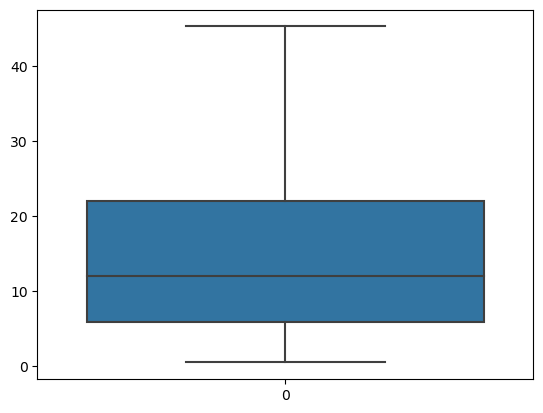

In [49]:
sns.boxplot(data['Tax 5%'])

<Axes: xlabel='Total', ylabel='Density'>

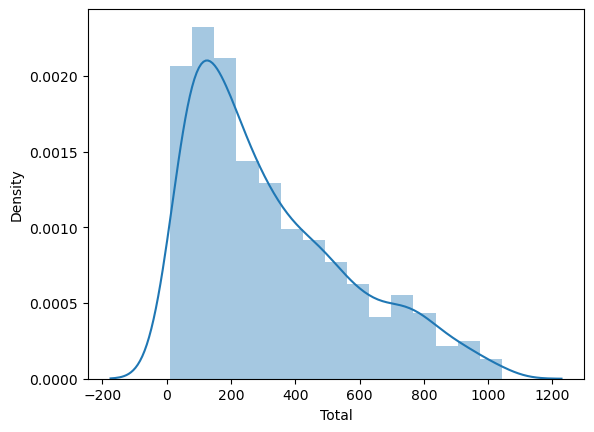

In [50]:
# Check distribution of outliers
sns.distplot(data['Total'])

In [51]:
IQR = stats.iqr(data['Total'],interpolation='midpoint')
IQR

347.8807499999999

In [52]:
# Min & Max limit calculation
# First Quantile
Q1 = data['Total'].quantile(0.25)
# third quantitle
Q3 = data['Total'].quantile(0.75)
# getting limits
min_limit = Q1 - 1.5*IQR
max_limit = Q3 + 1.2*IQR

In [53]:
print('Minimum Limit :',min_limit)
print('Maxmum Limit :',max_limit)

Minimum Limit : -397.39874999999995
Maxmum Limit : 888.8071499999999


In [54]:
data.loc[data['Total']<min_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


In [55]:
data.loc[data['Total']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
70,0,0.0,0,0,2,89.48,10,44.7400,939.5400,2019-01-06,2023-07-16 12:46:00,0,894.80,4.761905,44.7400,9.6
96,1,NaN,0,0,3,87.87,10,43.9350,922.6350,2019-03-29,2023-07-16 10:25:00,2,878.70,4.761905,43.9350,5.1
105,2,2.0,1,0,0,88.67,10,44.3350,931.0350,2019-01-12,2023-07-16 14:50:00,2,886.70,4.761905,44.3350,7.3
122,1,NaN,1,0,5,99.96,9,44.9820,944.6220,2019-03-09,2023-07-16 17:26:00,0,899.64,4.761905,44.9820,4.2
140,0,0.0,1,1,5,89.80,10,44.9000,942.9000,2019-01-23,2023-07-16 13:00:00,0,898.00,4.761905,44.9000,5.4
141,0,0.0,1,0,3,90.50,10,45.2500,950.2500,2019-01-25,2023-07-16 13:48:00,1,905.00,4.761905,45.2500,8.1
158,1,NaN,1,0,3,97.22,9,43.7490,918.7290,2019-03-30,2023-07-16 14:43:00,2,874.98,4.761905,43.7490,6.0
166,0,0.0,0,0,4,95.58,10,12.0880,1003.5900,2019-01-16,2023-07-16 13:32:00,1,955.80,4.761905,47.7900,4.8
167,2,2.0,0,0,1,98.98,10,12.0880,1039.2900,2019-02-08,2023-07-16 16:20:00,0,989.80,4.761905,49.4900,8.7
209,1,NaN,0,1,0,99.73,9,44.8785,942.4485,2019-03-02,2023-07-16 19:42:00,0,897.57,4.761905,44.8785,6.5


In [56]:
data.loc[data['Total']>max_limit,'Total']=np.median(data['Total'])

In [57]:
data.loc[data['Total']>max_limit]

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating


<Axes: >

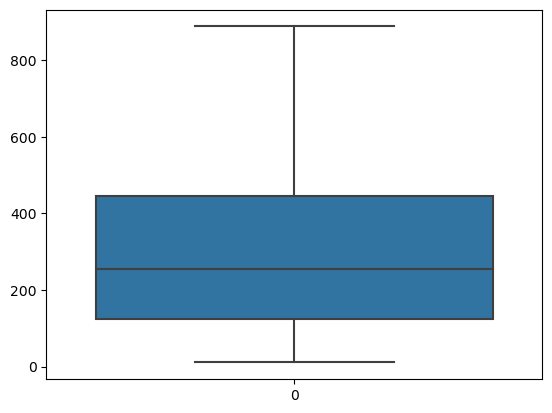

In [58]:
sns.boxplot(data.Total)

# Feature Selection

In [59]:
# Check redundant
data.describe()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
count,1000.000000,668.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,1.012000,1.017964,0.501000,0.501000,2.452000,55.672130,5.510000,15.049521,304.463366,2019-02-14 00:05:45.600000,2023-07-16 15:24:41.880000,1.034000,307.58738,4.761905e+00,15.379369,6.97270
min,0.000000,0.000000,0.000000,0.000000,0.000000,10.080000,1.000000,0.508500,10.678500,2019-01-01 00:00:00,2023-07-16 10:00:00,0.000000,10.17000,4.761905e+00,0.508500,4.00000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,32.875000,3.000000,5.924875,124.422375,2019-01-24 00:00:00,2023-07-16 12:43:00,0.000000,118.49750,4.761905e+00,5.924875,5.50000
50%,1.000000,2.000000,1.000000,1.000000,2.000000,55.230000,5.000000,12.084000,253.764000,2019-02-13 00:00:00,2023-07-16 15:19:00,1.000000,241.76000,4.761905e+00,12.088000,7.00000
75%,2.000000,2.000000,1.000000,1.000000,4.000000,77.935000,8.000000,22.041000,446.570250,2019-03-08 00:00:00,2023-07-16 18:15:00,2.000000,448.90500,4.761905e+00,22.445250,8.50000
max,2.000000,2.000000,1.000000,1.000000,5.000000,99.960000,10.000000,45.325000,888.615000,2019-03-30 00:00:00,2023-07-16 20:59:00,2.000000,993.00000,4.761905e+00,49.650000,10.00000
std,0.817633,1.000588,0.500249,0.500249,1.715412,26.494628,2.923431,11.271937,222.364535,NaN,NaN,0.809629,234.17651,6.131498e-14,11.708825,1.71858


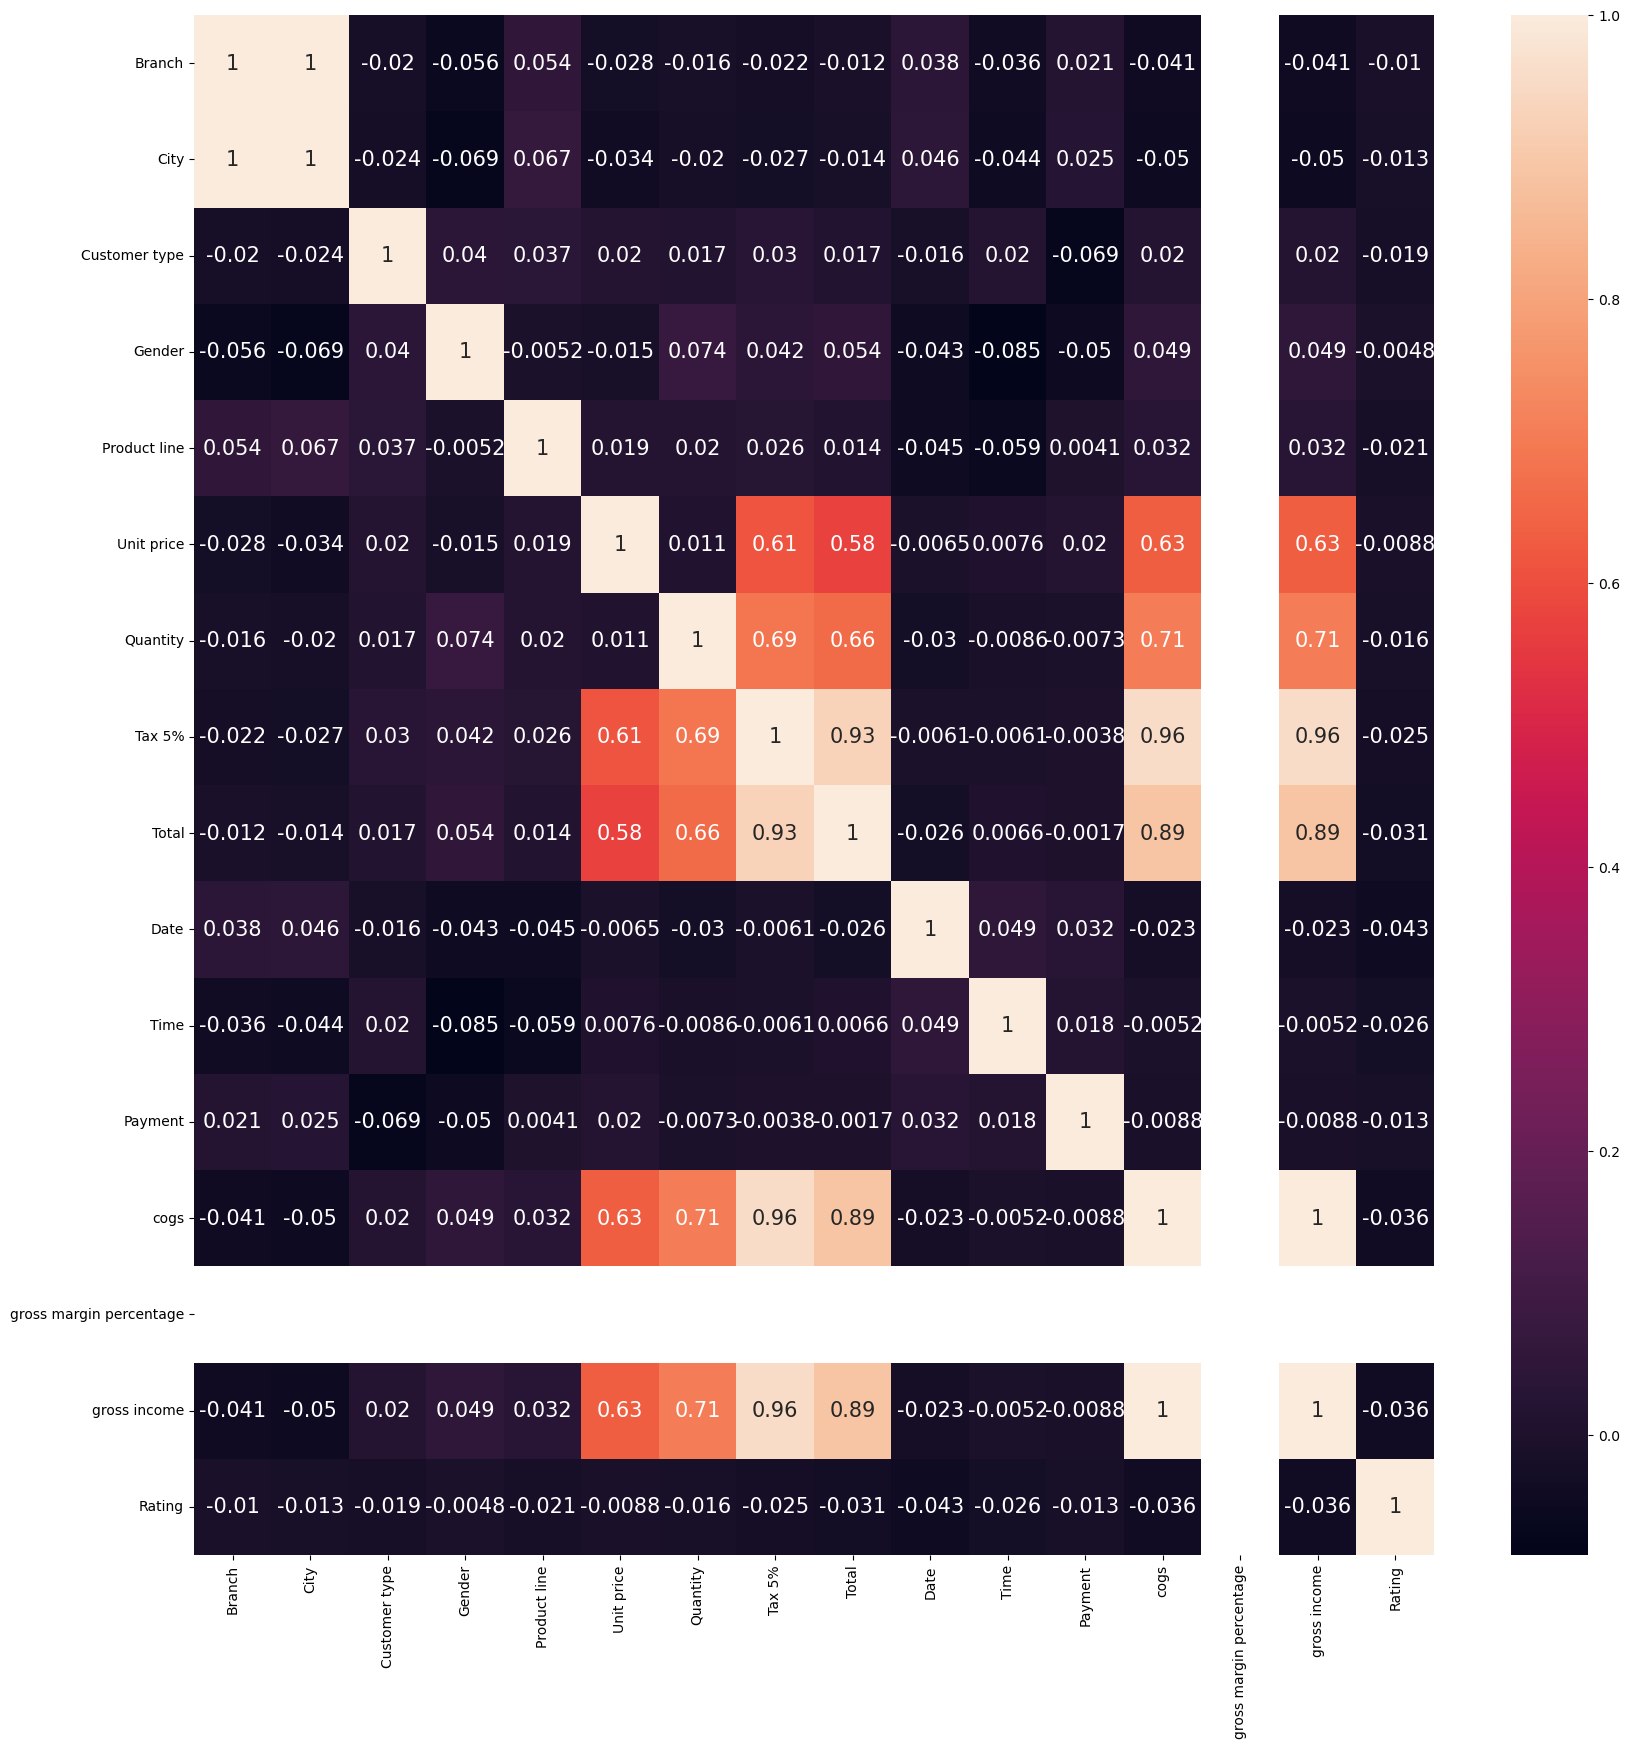

In [60]:
# Check correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':15})
plt.show()

# Model Selection and Building

In [61]:
data.columns

Index(['Branch', 'City', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date', 'Time', 'Payment',
       'cogs', 'gross margin percentage', 'gross income', 'Rating'],
      dtype='object')

In [62]:
data.drop(['Branch','City','Date','Time'],axis=1,inplace=True)

In [63]:
# Creating x & y
x = data.drop('Rating',axis=1)
y = data.Rating

In [64]:
data.Rating.unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [65]:
# Splitting data into train test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [66]:
print('x train shape :',x_train.shape)
print('x test shape :',x_test.shape)
print('y train shape :',y_train.shape)
print('y test shape :',y_test.shape)

x train shape : (800, 11)
x test shape : (200, 11)
y train shape : (800,)
y test shape : (200,)


# Linear Regression

In [68]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [69]:
y_lr_pred=lr.predict(x_test)

In [71]:
from sklearn.metrics import r2_score
print('R2 Score :',r2_score(y_test,y_lr_pred))

R2 Score : -0.0014710868937495292


# Decision Tree

In [72]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [73]:
y_dt_pred = dt.predict(x_test)

In [74]:
print('R2 Score',r2_score(y_test,y_dt_pred))

R2 Score -1.0187430732120744


# Random Forest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [83]:
y_rf_pred = dt.predict(x_test)

In [84]:
print('R2 Score :',r2_score(y_test,y_rf_pred))

R2 Score : -1.0187430732120744


# KNN

In [88]:
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [89]:
y_knn_pred = knn.predict(x_test)

In [90]:
print('R2 Score :',r2_score(y_test,y_knn_pred))

R2 Score : -0.12947649781602433


# support vector machine

In [91]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [94]:
y_svr_pred=svr.predict(x_test)

In [95]:
print('R2 Score :',r2_score(y_test,y_svr_pred))

R2 Score : -0.008564469434654942


# Bagging

In [96]:
from sklearn.ensemble import BaggingRegressor
bc=BaggingRegressor()
bc.fit(x_train,y_train)

BaggingRegressor()

In [97]:
y_bc_pred=bc.predict(x_test)

In [98]:
print('r2 Score :',r2_score(y_test,y_bc_pred))

r2 Score : -0.32026484777364894


In [99]:
data = [{'Model':'Linear Regressor','R2 Score':r2_score(y_test,y_lr_pred)},
       {'Model':'Decision Tree','R2 Score':r2_score(y_test,y_dt_pred)},
       {'Model':'Random Forest','R2 Score':r2_score(y_test,y_dt_pred)},
       {'Model':'KNN','R2 Score':r2_score(y_test,y_knn_pred)},
       {'Model':'SVR','R2 Score':r2_score(y_test,y_svr_pred)},
       {'model':'Bagging','R2 Score':r2_score(y_test,y_bc_pred)}]
df=data.DataFrame.from_dict(data)
df

AttributeError: 'list' object has no attribute 'DataFrame'